In [1]:
# Practice getting NFL data and making data tables

In [2]:
from sportsipy.nfl.schedule import Schedule
from sportsipy.nfl.teams import Teams
import pandas as pd
from sportsipy.nfl.boxscore import Boxscores, Boxscore
from datetime import date
import requests
from bs4 import BeautifulSoup
import re
import keras
import seaborn as sns
import sports

In [3]:
teams = Teams()
df = pd.DataFrame(columns = ['Name', 'Abbreviation', 'Penalties', 'Wins', 'Pass Attempts', 'Rush Attempts', 'First Downs',
                            'Turnovers', 'Strength of Schedule', 'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions'])

df['Name'] = [x.name for x in teams]
df['Abbreviation'] = [x.abbreviation for x in teams]
df['Wins'] = [x.wins for x in teams]
df['Penalties'] = [x.penalties for x in teams]
df['Pass Attempts'] = [x.pass_attempts for x in teams]
df['Rush Attempts'] = [x.rush_attempts for x in teams]
df['First Downs'] = [x.first_downs for x in teams]
df['Turnovers'] = [x.turnovers for x in teams]
df['Strength of Schedule'] = [x.strength_of_schedule for x in teams]
df['Rushing Yards'] = [x.rush_yards for x in teams]
df['Passing Yards'] = [x.pass_yards for x in teams]
df['Fumbles'] = [x.fumbles for x in teams]
df['Interceptions'] = [x.interceptions for x in teams]


In [4]:
correlation_data = df[['Wins', 'Pass Attempts', 'Rush Attempts', 'Penalties', 'Turnovers', 'First Downs', 'Strength of Schedule',
                  'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions']]
correlation_data.corr(method ='pearson')

,Wins,Pass Attempts,Rush Attempts,Penalties,Turnovers,First Downs,Strength of Schedule,Rushing Yards,Passing Yards,Fumbles,Interceptions
Wins,1.000000,0.191688,0.424945,-0.169453,-0.322438,0.758768,-0.212937,0.339052,0.635400,-0.125035,-0.305214
Pass Attempts,0.191688,1.000000,-0.503770,0.421182,0.256273,0.516347,0.262718,-0.418090,0.762617,0.159537,0.207923
Rush Attempts,0.424945,-0.503770,1.000000,-0.107492,-0.129898,0.354958,-0.268965,0.867882,-0.213178,-0.025871,-0.137076
Penalties,-0.169453,0.421182,-0.107492,1.000000,0.241146,0.149419,0.426938,-0.055704,0.213519,0.090926,0.229755
Turnovers,-0.322438,0.256273,-0.129898,0.241146,1.000000,-0.037104,0.180571,-0.192989,-0.112578,0.519843,0.870494
First Downs,0.758768,0.516347,0.354958,0.149419,-0.037104,1.000000,-0.035790,0.450107,0.734051,0.070873,-0.084245
Strength of Schedule,-0.212937,0.262718,-0.268965,0.426938,0.180571,-0.035790,1.000000,-0.238153,0.053617,0.083209,0.163328
Rushing Yards,0.339052,-0.418090,0.867882,-0.055704,-0.192989,0.450107,-0.238153,1.000000,-0.163205,0.028898,-0.242446
Passing Yards,0.635400,0.762617,-0.213178,0.213519,-0.112578,0.734051,0.053617,-0.163205,1.000000,-0.057051,-0.098847
Fumbles,-0.125035,0.159537,-0.025871,0.090926,0.519843,0.070873,0.083209,0.028898,-0.057051,1.000000,0.032071


<AxesSubplot:>

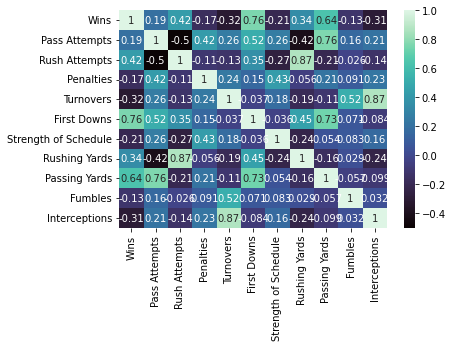

In [5]:
sns.heatmap(correlation_data.corr(), annot=True, cmap="mako")

In [6]:
# creating the date object of today's date
todays_date = date.today()

# web scrape CBS for current week
url = 'https://www.cbssports.com/nfl/schedule/'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="PageTitle-header").text
try:
    current_week = int(re.search(r'\d+', results).group())
except:
    print('Not in season')

games_today = Boxscores(current_week, todays_date.year)
# Prints a dictionary of all matchups for week 1 of 2017
# games_today = pd.DataFrame.from_dict(games_today.games)

In [7]:
current_schedule = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [8]:
game_date = []

for key in games_today.games.keys():
        current_schedule['Away Team'] =  [item['away_name'] for item in games_today.games[key]]
        current_schedule['Home Team'] =  [item['home_name'] for item in games_today.games[key]]
        current_schedule['Away Score'] =  [item['away_score'] for item in games_today.games[key]]
        current_schedule['Home Score'] =  [item['home_score'] for item in games_today.games[key]]
        current_schedule['Winner'] =  [item['winning_name'] for item in games_today.games[key]]
        game_date.extend(item['boxscore'] for item in games_today.games[key])

In [9]:
print(game_date) 

for i in range(len(game_date)):
    game_info = Boxscore(i)
    game_date[i] = game_info.date
    
print(game_date)     

['202112160sdg', '202112180clt', '202112190buf', '202112190rav', '202112190pit', '202112190nyg', '202112190mia', '202112190jax', '202112190det', '202112190sfo', '202112190den', '202112190tam', '202112200cle', '202112200chi', '202112210ram', '202112210phi']
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [10]:
history_of_seasons = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [11]:
year = todays_date.year
week = current_week-1
away = []
home = []
away_score = []
home_score = []
winner = []

while year >= todays_date.year-5:
    if year != todays_date.year: week = 16
    while week >= 1:
        previous_games = Boxscores(week, year)
        for key in previous_games.games.keys():
            away.extend(item['away_name'] for item in previous_games.games[key])
            home.extend(item['home_name'] for item in previous_games.games[key])
            away_score.extend(item['away_score'] for item in previous_games.games[key])
            home_score.extend(item['home_score'] for item in previous_games.games[key])
            winner.extend(item['winning_name'] for item in previous_games.games[key])
        week = week-1 
    year = year-1

In [12]:
history_of_seasons['Away Team'] =  away
history_of_seasons['Home Team'] =  home
history_of_seasons['Away Score'] = away_score
history_of_seasons['Home Score'] =  home_score
history_of_seasons['Winner'] =  winner

In [13]:
#history_of_seasons=history_of_seasons.replace({'Oakland Raiders': 'Las Vegas Raiders', 'St. Louis Rams':'Los Angeles Rams',
#                           'Washington Redskins':'Washington Football Team'}, regex=True)

In [14]:
history_of_seasons

,Away Team,Home Team,Away Score,Home Score,Winner
0,Pittsburgh Steelers,Minnesota Vikings,28,36,Minnesota Vikings
1,San Francisco 49ers,Cincinnati Bengals,26,23,San Francisco 49ers
2,Atlanta Falcons,Carolina Panthers,29,21,Atlanta Falcons
3,Dallas Cowboys,Washington Football Team,27,20,Dallas Cowboys
4,Jacksonville Jaguars,Tennessee Titans,0,20,Tennessee Titans
...,...,...,...,...,...
1403,Detroit Lions,Indianapolis Colts,39,35,Detroit Lions
1404,New York Giants,Dallas Cowboys,20,19,New York Giants
1405,New England Patriots,Arizona Cardinals,23,21,New England Patriots
1406,Pittsburgh Steelers,Washington Redskins,38,16,Pittsburgh Steelers
